# Data Import, Understanding, & Prep

### Import and understanding and prep

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as pp
import statsmodels.api as sm
import scipy
from scipy import stats

In [156]:
uni_raw = pd.read_csv('Universities.csv')
uni_raw.head()

,CollegeName,State,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,PctNewStudFromTop25Pct,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,AddFees,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,44.0,249.0,869.0,7560.0,7560.0,130.0,800.0,1500.0,NaN,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,3885.0,4519.0,1742.0,5226.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,24.0,492.0,1849.0,1742.0,5226.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,6209.0,10537.0,1742.0,5226.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,3958.0,305.0,1700.0,3400.0,155.0,500.0,850.0,53.0,14.3,40.0


In [157]:
uni_raw.describe()

,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,PctNewStudFromTop25Pct,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,AddFees,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate
count,1302.000000,1292.000000,1291.000000,1297.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,1028.000000,1254.000000,1121.000000,1269.000000,1300.000000,1204.000000
mean,1.639017,2752.097523,1870.683191,778.880493,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,392.012646,549.972887,1389.291704,68.639874,14.858769,60.405316
std,0.480470,3541.974712,2250.866400,884.578274,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,469.379234,167.355386,714.247857,17.831458,5.186399,18.889058
min,1.000000,35.000000,35.000000,18.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,695.750000,554.500000,236.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000
50%,2.000000,1470.000000,1095.000000,447.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,2.000000,3314.250000,2303.000000,984.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000
max,2.000000,48094.000000,26330.000000,7425.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


In [158]:
uni_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CollegeName             1302 non-null   object 
 1   State                   1302 non-null   object 
 2   Public (1)_Private (2)  1302 non-null   int64  
 3   NumAppRecd              1292 non-null   float64
 4   NumAppAccepted          1291 non-null   float64
 5   NumNewStudEnrolled      1297 non-null   float64
 6   PctNewStudFromTop25Pct  1100 non-null   float64
 7   NumFTUndergrad          1299 non-null   float64
 8   NumPTUndergrad          1270 non-null   float64
 9   InStateTuition          1272 non-null   float64
 10  OutofStateTuition       1282 non-null   float64
 11  AddFees                 1028 non-null   float64
 12  EstimBookCosts          1254 non-null   float64
 13  EstimPersonalMoney      1121 non-null   float64
 14  PctFacWithPHD           1269 non-null   

In [159]:
df = uni_raw
df.isna().sum()

CollegeName                 0
State                       0
Public (1)_Private (2)      0
NumAppRecd                 10
NumAppAccepted             11
NumNewStudEnrolled          5
PctNewStudFromTop25Pct    202
NumFTUndergrad              3
NumPTUndergrad             32
InStateTuition             30
OutofStateTuition          20
AddFees                   274
EstimBookCosts             48
EstimPersonalMoney        181
PctFacWithPHD              33
StudFacRatio                2
GraduationRate             98
dtype: int64

In [160]:
nullPercent = (df.isna().sum() / 1302) * 100
nullPercent = nullPercent.apply(lambda x: f'{x:.2f}%')
print(nullPercent)

CollegeName                0.00%
State                      0.00%
Public (1)_Private (2)     0.00%
NumAppRecd                 0.77%
NumAppAccepted             0.84%
NumNewStudEnrolled         0.38%
PctNewStudFromTop25Pct    15.51%
NumFTUndergrad             0.23%
NumPTUndergrad             2.46%
InStateTuition             2.30%
OutofStateTuition          1.54%
AddFees                   21.04%
EstimBookCosts             3.69%
EstimPersonalMoney        13.90%
PctFacWithPHD              2.53%
StudFacRatio               0.15%
GraduationRate             7.53%
dtype: object


### Impute Values

In [161]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['Public (1)_Private (2)',
 'NumAppRecd',
 'NumAppAccepted',
 'NumNewStudEnrolled',
 'PctNewStudFromTop25Pct',
 'NumFTUndergrad',
 'NumPTUndergrad',
 'InStateTuition',
 'OutofStateTuition',
 'AddFees',
 'EstimBookCosts',
 'EstimPersonalMoney',
 'PctFacWithPHD',
 'StudFacRatio',
 'GraduationRate']

In [162]:
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

df.isna().sum()

CollegeName               0
State                     0
Public (1)_Private (2)    0
NumAppRecd                0
NumAppAccepted            0
NumNewStudEnrolled        0
PctNewStudFromTop25Pct    0
NumFTUndergrad            0
NumPTUndergrad            0
InStateTuition            0
OutofStateTuition         0
AddFees                   0
EstimBookCosts            0
EstimPersonalMoney        0
PctFacWithPHD             0
StudFacRatio              0
GraduationRate            0
dtype: int64

In [163]:
df.head()

,CollegeName,State,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,PctNewStudFromTop25Pct,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,AddFees,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,44.0,249.0,869.0,7560.0,7560.0,130.0,800.0,1500.0,71.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,50.0,3885.0,4519.0,1742.0,5226.0,155.0,650.0,2304.0,67.0,10.0,60.0
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,24.0,492.0,1849.0,1742.0,5226.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,50.0,6209.0,10537.0,1742.0,5226.0,114.0,580.0,1260.0,48.0,13.7,60.0
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,50.0,3958.0,305.0,1700.0,3400.0,155.0,500.0,850.0,53.0,14.3,40.0


In [164]:
df.drop(['CollegeName', 'State',
          'AddFees', 'PctNewStudFromTop25Pct'],
        axis=1,
        inplace=True
        )

df['Public (1)_Private (2)'] = df['Public (1)_Private (2)'].replace(1, False)
df['Public (1)_Private (2)'] = df['Public (1)_Private (2)'].replace(2, True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Public (1)_Private (2)  1302 non-null   bool   
 1   NumAppRecd              1302 non-null   float64
 2   NumAppAccepted          1302 non-null   float64
 3   NumNewStudEnrolled      1302 non-null   float64
 4   NumFTUndergrad          1302 non-null   float64
 5   NumPTUndergrad          1302 non-null   float64
 6   InStateTuition          1302 non-null   float64
 7   OutofStateTuition       1302 non-null   float64
 8   EstimBookCosts          1302 non-null   float64
 9   EstimPersonalMoney      1302 non-null   float64
 10  PctFacWithPHD           1302 non-null   float64
 11  StudFacRatio            1302 non-null   float64
 12  GraduationRate          1302 non-null   float64
dtypes: bool(1), float64(12)
memory usage: 123.5 KB


In [165]:
df.describe()

,NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate
count,1302.000000,1302.00000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2742.250384,1864.12980,777.605991,3688.331797,1066.546083,7900.793395,9267.582949,548.204301,1369.927803,68.699693,14.857911,60.374808
std,3530.112207,2242.45563,883.115612,4540.500985,1654.206143,5286.190564,4139.262022,164.487885,664.454720,17.607768,5.182457,18.164021
min,35.000000,35.00000,18.000000,59.000000,1.000000,480.000000,1044.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,699.000000,557.25000,237.000000,967.250000,136.500000,2610.750000,6140.000000,498.500000,950.000000,57.000000,11.800000,48.000000
50%,1470.000000,1095.00000,447.000000,1812.000000,472.000000,8050.000000,8670.000000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,3302.250000,2294.50000,978.250000,4538.750000,1286.000000,11500.000000,11600.000000,600.000000,1664.750000,82.000000,17.575000,72.000000
max,48094.000000,26330.00000,7425.000000,31643.000000,21836.000000,25750.000000,25750.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


# Clustering

### Import and first model

In [166]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score

In [167]:
k = 5
KMeanList = list(range(2,21))
print(KMeanList)
df.head()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate
0,True,193.0,146.0,55.0,249.0,869.0,7560.0,7560.0,800.0,1500.0,71.0,11.9,15.0
1,False,1852.0,1427.0,928.0,3885.0,4519.0,1742.0,5226.0,650.0,2304.0,67.0,10.0,60.0
2,False,146.0,117.0,89.0,492.0,1849.0,1742.0,5226.0,500.0,1162.0,39.0,9.5,39.0
3,False,2065.0,1598.0,1162.0,6209.0,10537.0,1742.0,5226.0,580.0,1260.0,48.0,13.7,60.0
4,False,2817.0,1920.0,984.0,3958.0,305.0,1700.0,3400.0,500.0,850.0,53.0,14.3,40.0


In [168]:
kmeans = KMeans(n_clusters=k, n_init=2, random_state=42)
kmeans.fit(df)
print(kmeans.inertia_)
df.head()

26424807551.20036


,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate
0,True,193.0,146.0,55.0,249.0,869.0,7560.0,7560.0,800.0,1500.0,71.0,11.9,15.0
1,False,1852.0,1427.0,928.0,3885.0,4519.0,1742.0,5226.0,650.0,2304.0,67.0,10.0,60.0
2,False,146.0,117.0,89.0,492.0,1849.0,1742.0,5226.0,500.0,1162.0,39.0,9.5,39.0
3,False,2065.0,1598.0,1162.0,6209.0,10537.0,1742.0,5226.0,580.0,1260.0,48.0,13.7,60.0
4,False,2817.0,1920.0,984.0,3958.0,305.0,1700.0,3400.0,500.0,850.0,53.0,14.3,40.0


### Transform data

In [169]:
# Try transforming the data and then check interia
df_standardized = df.copy()

zscore_columns = ['InStateTuition', 'OutofStateTuition', 'PctFacWithPHD',
                  'GraduationRate']
log_columns = ['NumAppRecd', 'NumAppAccepted', 'NumNewStudEnrolled',
               'NumFTUndergrad', 'NumPTUndergrad', 'EstimBookCosts',
               'EstimPersonalMoney', 'StudFacRatio']


for col in zscore_columns:
    df_standardized[col] = zscore(df_standardized[col])

for col in log_columns:
    df_standardized[col] = np.log(df_standardized[col])
    
df_standardized.describe()

,NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1.302000e+03,1.302000e+03,1302.000000,1302.000000,1.302000e+03,1302.000000,1.302000e+03
mean,7.330193,7.018028,6.167270,7.644124,5.967578,7.367379e-17,2.060137e-16,6.268096,7.116221,5.457317e-17,2.648169,-6.548781e-17
std,1.098936,1.028871,0.995236,1.055140,1.616118,1.000384e+00,1.000384e+00,0.279692,0.468692,1.000384e+00,0.320163,1.000384e+00
min,3.555348,3.555348,2.890372,4.077537,0.000000,-1.404347e+00,-1.987490e+00,4.499810,4.317488,-3.448649e+00,0.832909,-2.884545e+00
25%,6.549651,6.323014,5.468060,6.874457,4.916305,-1.001113e+00,-7.558798e-01,6.211602,6.856462,-6.647173e-01,2.468100,-6.815431e-01
50%,7.293018,6.998510,6.102559,7.502186,6.156979,2.823658e-02,-1.444249e-01,6.218600,7.130899,1.306918e-01,2.660260,-2.064257e-02
75%,8.102359,7.738270,6.885760,8.420407,7.159291,6.811312e-01,5.637027e-01,6.396930,7.417430,7.556561e-01,2.866474,6.402580e-01
max,10.780913,10.178464,8.912608,10.362272,9.991315,3.377870e+00,3.983500e+00,7.757906,8.839277,2.062400e+00,4.519612,3.173710e+00


In [170]:
kmean_standardized = KMeans(n_clusters=k, n_init=2, random_state=42)
kmean_standardized.fit(df_standardized)
kmean_standardized.inertia_

5994.426056514315

### Elbow plot and Silhouette Score

In [171]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_standardized) for k in range(1,21)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\LearningEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

In [172]:
kmeans_per_k[5].labels_

array([5, 2, 5, ..., 1, 0, 4])

In [173]:
inertias

[15112.701647405413,
 9644.576671162506,
 7463.702173107869,
 6629.087624900336,
 5994.426056514315,
 5499.963708041401,
 5162.077251830251,
 4900.9953570302105,
 4697.703536698983,
 4504.456140180958,
 4339.042047511344,
 4209.080991211359,
 4089.413895209512,
 3957.0654121213074,
 3852.5567812757527,
 3767.6908971105076,
 3686.826468831019,
 3638.871579707569,
 3559.026246279817,
 3487.0504217245193]

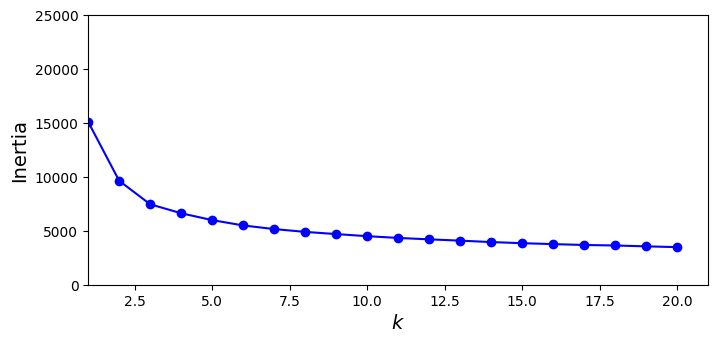

In [174]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 21), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 21, 0, 25000])
plt.show()

In [175]:
silhouette_scores = [silhouette_score(df_standardized, model.labels_)
                     for model in kmeans_per_k[1:]]

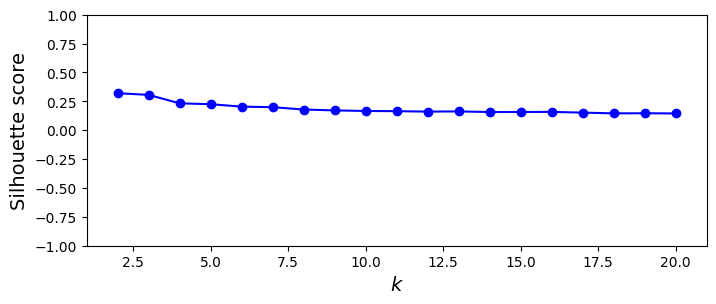

In [176]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 21), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 21, -1, 1])
plt.show()

### Assign clusters back to data

In [177]:
df_cluster_label = df.copy()

df_standardized['ClusterPrediction'] = kmeans_per_k[2].labels_
df['ClusterPrediction'] = kmeans_per_k[2].labels_
df_cluster_label['ClusterPrediction'] = kmeans_per_k[2].labels_
df_cluster_label.head()

,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate,ClusterPrediction
0,True,193.0,146.0,55.0,249.0,869.0,7560.0,7560.0,800.0,1500.0,71.0,11.9,15.0,1
1,False,1852.0,1427.0,928.0,3885.0,4519.0,1742.0,5226.0,650.0,2304.0,67.0,10.0,60.0,0
2,False,146.0,117.0,89.0,492.0,1849.0,1742.0,5226.0,500.0,1162.0,39.0,9.5,39.0,1
3,False,2065.0,1598.0,1162.0,6209.0,10537.0,1742.0,5226.0,580.0,1260.0,48.0,13.7,60.0,0
4,False,2817.0,1920.0,984.0,3958.0,305.0,1700.0,3400.0,500.0,850.0,53.0,14.3,40.0,0


### Cross tabs

In [178]:
cross_tab1 = pd.crosstab(df_cluster_label['ClusterPrediction'], df_cluster_label['Public (1)_Private (2)'], margins=True, margins_name='Total')
cross_tab1

Public (1)_Private (2),False,True,Total
ClusterPrediction,,,
0,402,49,451
1,65,503,568
2,3,280,283
Total,470,832,1302


In [179]:
# Create bins for graduation rate
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']
df_cluster_label['GraduationRateBin'] = pd.cut(df_cluster_label['GraduationRate'], bins=bins, labels=labels)

# Cross-tabulate Cluster Prediction and Graduation Rate bins
cross_tab2 = pd.crosstab(df_cluster_label['ClusterPrediction'], df_cluster_label['GraduationRateBin'], margins=True, margins_name='Total')
cross_tab2

GraduationRateBin,0-20%,21-40%,41-60%,61-80%,81-100%,Total
ClusterPrediction,,,,,,
0,11,96,228,102,14,451
1,6,74,276,170,42,568
2,0,0,21,128,133,282
Total,17,170,525,400,189,1301


In [180]:
# Create bins for graduation rate
bins = [0, 30, 60, 90, 120, 150]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150']
df_cluster_label['FacWithPHDBin'] = pd.cut(df_cluster_label['PctFacWithPHD'], bins=bins, labels=labels)

cross_tab3 = pd.crosstab(df_cluster_label['ClusterPrediction'], df_cluster_label['FacWithPHDBin'], margins=True, margins_name='Total')
cross_tab3

FacWithPHDBin,0-30,30-60,60-90,90-120,Total
ClusterPrediction,,,,,
0,2,73,340,36,451
1,27,289,242,10,568
2,2,8,187,86,283
Total,31,370,769,132,1302


In [181]:
# Create bins for graduation rate
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
labels = ['0-5,000', '5,000-10,000', '10,000-15,000', '15000-20,000', '20,000-25,000', '25,000-30,000' ]
df_cluster_label['OutofStateTuitionBin'] = pd.cut(df_cluster_label['OutofStateTuition'], bins=bins, labels=labels)

cross_tab4 = pd.crosstab(df_cluster_label['ClusterPrediction'], df_cluster_label['OutofStateTuitionBin'], margins=True, margins_name='Total')
cross_tab4

OutofStateTuitionBin,"0-5,000","5,000-10,000","10,000-15,000","15000-20,000","20,000-25,000","25,000-30,000",Total
ClusterPrediction,,,,,,,
0,120,290,37,4,0,0,451
1,65,342,157,4,0,0,568
2,0,9,142,126,4,2,283
Total,185,641,336,134,4,2,1302


### Describe() for each cluster

In [182]:
df_cluster_label[df_cluster_label['ClusterPrediction'] == 0].describe()

,NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate,ClusterPrediction
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.0
mean,4990.760532,3508.705100,1547.725055,7796.199557,2346.013304,3179.802661,6641.343681,559.172949,1578.815965,73.676275,17.437472,51.762749,0.0
std,4480.092551,2921.501896,1070.653314,5491.014724,2208.846275,2797.372452,2474.954193,139.679526,661.046665,13.289489,3.991089,15.348515,0.0
min,675.000000,551.000000,232.000000,1139.000000,118.000000,480.000000,1044.000000,96.000000,300.000000,11.000000,4.600000,8.000000,0.0
25%,2087.500000,1556.500000,816.000000,3792.000000,914.500000,1735.500000,4888.000000,500.000000,1250.000000,66.000000,15.050000,41.000000,0.0
50%,3579.000000,2697.000000,1259.000000,6038.000000,1630.000000,2262.000000,6490.000000,550.000000,1357.000000,75.000000,17.700000,53.000000,0.0
75%,6073.000000,4097.500000,1889.500000,10117.000000,3107.000000,3085.500000,7870.000000,612.000000,1988.000000,82.500000,19.700000,61.000000,0.0
max,48094.000000,26330.000000,7425.000000,31643.000000,21836.000000,18420.000000,18420.000000,1550.000000,6800.000000,100.000000,42.600000,100.000000,0.0


In [183]:
df_cluster_label[df_cluster_label['ClusterPrediction'] == 1].describe()

,NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate,ClusterPrediction
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.0
mean,771.716549,570.640845,249.036972,1068.084507,429.353873,8156.656690,8510.538732,533.394366,1356.515845,57.758803,14.216197,57.839789,1.0
std,603.046653,339.894056,136.976744,701.730348,574.021830,3207.853797,2702.222088,163.852892,682.847854,16.180418,5.888304,15.794783,0.0
min,35.000000,35.000000,18.000000,59.000000,3.000000,556.000000,1672.000000,90.000000,75.000000,8.000000,2.300000,15.000000,1.0
25%,398.500000,320.750000,145.000000,620.000000,99.750000,6237.500000,6566.500000,450.000000,950.000000,48.000000,11.500000,48.750000,1.0
50%,633.000000,511.500000,224.500000,928.000000,268.500000,8667.000000,8677.000000,500.000000,1250.000000,58.000000,13.400000,60.000000,1.0
75%,955.000000,743.250000,322.000000,1346.250000,521.250000,10398.750000,10398.750000,600.000000,1603.750000,68.000000,15.800000,67.000000,1.0
max,6407.000000,1924.000000,806.000000,9950.000000,5346.000000,18375.000000,18375.000000,2340.000000,6900.000000,105.000000,91.800000,100.000000,1.0


In [184]:
df_cluster_label[df_cluster_label['ClusterPrediction'] == 2].describe()

,NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate,ClusterPrediction
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.0
mean,3113.929329,1839.388693,611.187279,2400.883392,306.424028,14910.816254,14972.300353,560.448763,1063.954064,82.727915,12.034982,79.187279,2.0
std,2947.293615,1284.932715,438.239349,1878.505520,400.545705,3263.379788,3121.631637,197.291734,487.766237,11.996165,3.050929,12.565160,0.0
min,300.000000,171.000000,114.000000,303.000000,1.000000,2808.000000,5224.000000,250.000000,300.000000,22.000000,2.900000,42.000000,2.0
25%,1392.500000,1001.500000,352.000000,1322.000000,40.500000,12674.500000,12674.500000,450.000000,750.000000,76.000000,10.300000,70.000000,2.0
50%,2083.000000,1485.000000,487.000000,1820.000000,134.000000,14550.000000,14550.000000,500.000000,1000.000000,85.000000,12.200000,80.000000,2.0
75%,3480.500000,2100.500000,691.000000,2728.000000,472.000000,17230.000000,17230.000000,600.000000,1250.000000,91.000000,13.900000,90.000000,2.0
max,19227.000000,8498.000000,3286.000000,13259.000000,1914.000000,25750.000000,25750.000000,2000.000000,3466.000000,100.000000,21.500000,118.000000,2.0


# Correlations

In [185]:
corr_cols = ['NumAppRecd', 'NumAppAccepted',
       'NumNewStudEnrolled', 'NumFTUndergrad', 'NumPTUndergrad',
       'InStateTuition', 'OutofStateTuition', 'EstimBookCosts',
       'EstimPersonalMoney', 'PctFacWithPHD', 'StudFacRatio',
       'ClusterPrediction']

corr_matrix = df[corr_cols].corr()

def categorize_correlation(val):
    if 0 <= abs(val) < 0.3:
        return 'Weak'
    elif 0.3 <= abs(val) < 0.7:
        return 'Medium'
    elif abs(val) < 1.0:
        return 'Strong'
    else:
       return ''
 
corr_matrix_binned = corr_matrix.applymap(categorize_correlation)
corr_matrix_binned

,NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,ClusterPrediction
NumAppRecd,,Strong,Strong,Strong,Medium,Weak,Weak,Weak,Weak,Medium,Weak,Weak
NumAppAccepted,Strong,,Strong,Strong,Medium,Weak,Weak,Weak,Weak,Medium,Weak,Medium
NumNewStudEnrolled,Strong,Strong,,Strong,Medium,Medium,Weak,Weak,Weak,Medium,Weak,Medium
NumFTUndergrad,Strong,Strong,Strong,,Medium,Medium,Weak,Weak,Weak,Medium,Weak,Medium
NumPTUndergrad,Medium,Medium,Medium,Medium,,Medium,Weak,Weak,Weak,Weak,Weak,Medium
InStateTuition,Weak,Weak,Medium,Medium,Medium,,Strong,Weak,Weak,Weak,Medium,Strong
OutofStateTuition,Weak,Weak,Weak,Weak,Weak,Strong,,Weak,Weak,Medium,Medium,Strong
EstimBookCosts,Weak,Weak,Weak,Weak,Weak,Weak,Weak,,Weak,Weak,Weak,Weak
EstimPersonalMoney,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,,Weak,Weak,Weak
PctFacWithPHD,Medium,Medium,Medium,Medium,Weak,Weak,Medium,Weak,Weak,,Weak,Weak


# PCA

In [186]:
from sklearn.decomposition import PCA

In [187]:
df_pca = df_standardized.copy()

pca = PCA(n_components=4)
X2D = pca.fit_transform(df_pca.drop(['Public (1)_Private (2)', 'GraduationRate'], axis=1))

print(pca.explained_variance_ratio_)

cumulative_sum = 0

for value in pca.explained_variance_ratio_:
    cumulative_sum += value
    print(cumulative_sum)

[0.53347578 0.25731022 0.0904531  0.05326415]
0.5334757825405201
0.7907860051970712
0.8812391088351113
0.9345032552826352


In [188]:
df_standardized.head()

,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate,ClusterPrediction
0,True,5.262690,4.983607,4.007333,5.517453,6.767343,-0.064493,-0.412692,6.684612,7.313220,0.130692,2.476538,-2.499020,1
1,False,7.524021,7.263330,6.833032,8.264878,8.416046,-1.165520,-0.976777,6.476972,7.742402,-0.096568,2.302585,-0.020643,0
2,False,4.983607,4.762174,4.488636,6.198479,7.522400,-1.165520,-0.976777,6.214608,7.057898,-1.687386,2.251292,-1.177218,1
3,False,7.632886,7.376508,7.057898,8.733755,9.262648,-1.165520,-0.976777,6.363028,7.138867,-1.176052,2.617396,-0.020643,0
4,False,7.943428,7.560080,6.891626,8.283494,5.720312,-1.173468,-1.418088,6.214608,6.745236,-0.891977,2.660260,-1.122143,0


In [189]:
components = pca.components_
components

array([[-0.36389751, -0.35662738, -0.36991463, -0.40698609, -0.54307463,
         0.23738662,  0.154405  , -0.01188598, -0.0545983 , -0.12111298,
        -0.05611149,  0.20459355],
       [ 0.34802987,  0.2926346 ,  0.19169614,  0.15200134, -0.34100989,
         0.40988586,  0.48347292,  0.01595963, -0.05673119,  0.39195665,
        -0.06440518,  0.23258756],
       [ 0.16744663,  0.15733948,  0.19913844,  0.11924394, -0.75372419,
        -0.37556545, -0.38751255, -0.02213832,  0.02170393, -0.09778427,
         0.06560812, -0.13851997],
       [-0.19844065, -0.1806035 , -0.13132229, -0.04976856, -0.01637522,
        -0.2392789 , -0.16534081, -0.00853241,  0.02848526,  0.90111447,
         0.00917228, -0.10220316]])

In [190]:
components = pca.components_

component_idx = 0
component_loadings = components[component_idx].argsort()[::-1]
variables_with_highest_loadings = [list(df_pca.columns)[i] for i in component_loadings]
#component_loadings.argsort()

In [191]:
df_pca.columns

Index(['Public (1)_Private (2)', 'NumAppRecd', 'NumAppAccepted',
       'NumNewStudEnrolled', 'NumFTUndergrad', 'NumPTUndergrad',
       'InStateTuition', 'OutofStateTuition', 'EstimBookCosts',
       'EstimPersonalMoney', 'PctFacWithPHD', 'StudFacRatio', 'GraduationRate',
       'ClusterPrediction'],
      dtype='object')

In [192]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df_pca.drop(['Public (1)_Private (2)', 'GraduationRate'], axis=1).columns)
loadings

,PC1,PC2,PC3,PC4
NumAppRecd,-0.363898,0.348030,0.167447,-0.198441
NumAppAccepted,-0.356627,0.292635,0.157339,-0.180603
NumNewStudEnrolled,-0.369915,0.191696,0.199138,-0.131322
NumFTUndergrad,-0.406986,0.152001,0.119244,-0.049769
NumPTUndergrad,-0.543075,-0.341010,-0.753724,-0.016375
InStateTuition,0.237387,0.409886,-0.375565,-0.239279
OutofStateTuition,0.154405,0.483473,-0.387513,-0.165341
EstimBookCosts,-0.011886,0.015960,-0.022138,-0.008532
EstimPersonalMoney,-0.054598,-0.056731,0.021704,0.028485
PctFacWithPHD,-0.121113,0.391957,-0.097784,0.901114


# g) Regression Models

### Linear Models

g)	Fit four regression models (use the Node: “Linear Regression”, therefore three separate “Linear Regression” nodes) predicting graduation rate (GraduationRate is the target variable here finally). 

i)	Use the “Private/Public” variable AND your principal components only.  What is the adjusted R2 value?  Insert a screenshot of the Predictor Importance Output.  

In [193]:
pc_values = pca.fit_transform(df_pca.drop(['Public (1)_Private (2)','GraduationRate'],axis = 1))
df_pca[['PC1', 'PC2', 'PC3', 'PC4']] = pd.DataFrame(pc_values[:,0:4])
df_pca.head()

,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate,ClusterPrediction,PC1,PC2,PC3,PC4
0,True,5.262690,4.983607,4.007333,5.517453,6.767343,-0.064493,-0.412692,6.684612,7.313220,0.130692,2.476538,-2.499020,1,2.633539,-2.463129,-1.815526,1.342824
1,False,7.524021,7.263330,6.833032,8.264878,8.416046,-1.165520,-0.976777,6.476972,7.742402,-0.096568,2.302585,-0.020643,0,-2.597906,-1.674065,-0.635193,0.214084
2,False,4.983607,4.762174,4.488636,6.198479,7.522400,-1.165520,-0.976777,6.214608,7.057898,-1.687386,2.251292,-1.177218,1,1.852696,-4.101891,-1.489186,0.041827
3,False,7.632886,7.376508,7.057898,8.733755,9.262648,-1.165520,-0.976777,6.363028,7.138867,-1.176052,2.617396,-0.020643,0,-3.264278,-2.188347,-1.020937,-0.880759
4,False,7.943428,7.560080,6.891626,8.283494,5.720312,-1.173468,-1.418088,6.214608,6.745236,-0.891977,2.660260,-1.122143,0,-1.357823,-1.006965,1.786863,-0.551987


In [194]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Public (1)_Private (2)  1302 non-null   bool   
 1   NumAppRecd              1302 non-null   float64
 2   NumAppAccepted          1302 non-null   float64
 3   NumNewStudEnrolled      1302 non-null   float64
 4   NumFTUndergrad          1302 non-null   float64
 5   NumPTUndergrad          1302 non-null   float64
 6   InStateTuition          1302 non-null   float64
 7   OutofStateTuition       1302 non-null   float64
 8   EstimBookCosts          1302 non-null   float64
 9   EstimPersonalMoney      1302 non-null   float64
 10  PctFacWithPHD           1302 non-null   float64
 11  StudFacRatio            1302 non-null   float64
 12  GraduationRate          1302 non-null   float64
 13  ClusterPrediction       1302 non-null   int32  
 14  PC1                     1302 non-null   

Adj-R2 is 0.401

In [195]:
df_pca['Public (1)_Private (2)'] = df_pca['Public (1)_Private (2)'].astype(int)
model = sm.OLS(df_pca['GraduationRate'], df_pca[['Public (1)_Private (2)', 'PC1', 'PC2', 'PC3', 'PC4']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         GraduationRate   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.401
Method:                 Least Squares   F-statistic:                              175.3
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                   1.23e-142
Time:                        20:11:16   Log-Likelihood:                         -1511.3
No. Observations:                1302   AIC:                                      3033.
Df Residuals:                    1297   BIC:                                      3059.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Public (1)_Private (2)     0.0314      0.031      1.007      0.314      -0.030       0.093
PC1                        0.0854      0.010      8.532      0.000       0.066       0.105
PC2                        0.3388      0.013     26.081      0.000       0.313       0.364
PC3                       -0.1348      0.022     -6.149      0.000      -0.178      -0.092
PC4                       -0.1239      0.028     -4.370      0.000      -0.180      -0.068
==============================================================================
Omnibus:                       17.780   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.886
Skew:                           0.114   Prob(JB):                     1.45e-06
Kurtosis:                       3.666   Cond. No.                         3.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ii)	Use the “Public/Private” variable AND your principal components AND your cluster variable (created from the above practice). What is the adjusted R2 value? Insert a screenshot of the Predictor Importance Output.  

Adj-R2 is 0.402

In [196]:
model = sm.OLS(df_pca['GraduationRate'], df_pca[['Public (1)_Private (2)', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterPrediction']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         GraduationRate   R-squared (uncentered):                   0.404
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                              146.6
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                   5.40e-142
Time:                        20:11:16   Log-Likelihood:                         -1510.2
No. Observations:                1302   AIC:                                      3032.
Df Residuals:                    1296   BIC:                                      3063.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Public (1)_Private (2)    -0.0560      0.065     -0.859      0.391      -0.184       0.072
PC1                        0.0835      0.010      8.273      0.000       0.064       0.103
PC2                        0.3283      0.015     22.290      0.000       0.299       0.357
PC3                       -0.1355      0.022     -6.184      0.000      -0.178      -0.093
PC4                       -0.1267      0.028     -4.461      0.000      -0.182      -0.071
ClusterPrediction          0.0728      0.048      1.525      0.127      -0.021       0.166
==============================================================================
Omnibus:                       17.865   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.213
Skew:                           0.111   Prob(JB):                     1.23e-06
Kurtosis:                       3.673   Cond. No.                         9.26
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

iii)	Use the “Public/Private” variable AND your original 11 continuous variables in e) (Exclude your principal components and other variables). What is the adjusted R2 value? Insert a screenshot of the Predictor Importance Output.  

Adj-R2 is 0.406

In [197]:
model = sm.OLS(df_pca['GraduationRate'], df_pca.drop(['GraduationRate', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterPrediction'], axis=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         GraduationRate   R-squared (uncentered):                   0.412
Model:                            OLS   Adj. R-squared (uncentered):              0.406
Method:                 Least Squares   F-statistic:                              75.25
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                   2.64e-139
Time:                        20:11:16   Log-Likelihood:                         -1502.0
No. Observations:                1302   AIC:                                      3028.
Df Residuals:                    1290   BIC:                                      3090.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Public (1)_Private (2)     0.4386      0.099      4.414      0.000       0.244       0.634
NumAppRecd                 0.4507      0.081      5.535      0.000       0.291       0.610
NumAppAccepted            -0.3292      0.099     -3.341      0.001      -0.523      -0.136
NumNewStudEnrolled         0.0167      0.089      0.188      0.851      -0.158       0.191
NumFTUndergrad             0.0828      0.073      1.134      0.257      -0.060       0.226
NumPTUndergrad            -0.0615      0.019     -3.250      0.001      -0.099      -0.024
InStateTuition             0.0895      0.098      0.916      0.360      -0.102       0.281
OutofStateTuition          0.2874      0.079      3.638      0.000       0.132       0.442
EstimBookCosts            -0.0684      0.058     -1.172      0.242      -0.183       0.046
EstimPersonalMoney        -0.1135      0.045     -2.525      0.012      -0.202      -0.025
PctFacWithPHD              0.0440      0.027      1.618      0.106      -0.009       0.097
StudFacRatio              -0.1534      0.079     -1.950      0.051      -0.308       0.001
==============================================================================
Omnibus:                       17.814   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.010
Skew:                           0.039   Prob(JB):                     3.04e-07
Kurtosis:                       3.740   Cond. No.                         124.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

iv)	Use the “Public/Private” variable AND your original 11 continuous variables in e) AND your cluster variable. What is the adjusted R2 value? Insert a screenshot of the Predictor Importance Output.  

Adj-R2 is 0.423

In [198]:
model = sm.OLS(df_pca['GraduationRate'], df_pca.drop(['GraduationRate', 'PC1', 'PC2', 'PC3', 'PC4'], axis=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         GraduationRate   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.423
Method:                 Least Squares   F-statistic:                              74.53
Date:                Thu, 28 Sep 2023   Prob (F-statistic):                   1.23e-146
Time:                        20:11:16   Log-Likelihood:                         -1482.5
No. Observations:                1302   AIC:                                      2991.
Df Residuals:                    1289   BIC:                                      3058.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Public (1)_Private (2)     0.3248      0.100      3.260      0.001       0.129       0.520
NumAppRecd                 0.4545      0.080      5.664      0.000       0.297       0.612
NumAppAccepted            -0.3273      0.097     -3.370      0.001      -0.518      -0.137
NumNewStudEnrolled        -0.0021      0.088     -0.024      0.981      -0.174       0.170
NumFTUndergrad             0.1071      0.072      1.487      0.137      -0.034       0.248
NumPTUndergrad            -0.0295      0.019     -1.526      0.127      -0.067       0.008
InStateTuition            -0.0310      0.098     -0.316      0.752      -0.224       0.162
OutofStateTuition          0.2757      0.078      3.540      0.000       0.123       0.428
EstimBookCosts            -0.1245      0.058     -2.137      0.033      -0.239      -0.010
EstimPersonalMoney        -0.1173      0.044     -2.648      0.008      -0.204      -0.030
PctFacWithPHD              0.0303      0.027      1.128      0.259      -0.022       0.083
StudFacRatio              -0.2066      0.078     -2.649      0.008      -0.360      -0.054
ClusterPrediction          0.3336      0.053      6.259      0.000       0.229       0.438
==============================================================================
Omnibus:                       19.474   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.153
Skew:                           0.028   Prob(JB):                     3.83e-08
Kurtosis:                       3.791   Cond. No.                         124.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Additional analysis (Suggested to be done in Class #2)  

a)	From Week 3 Class #2 notes, add an ANOVA comparison of at least 2 variables in your clusters, to see if those variables are statistically significant variables differentiating the clusters.  

b)	Use these to help with your labeling/interpretation of your clusters. Provide your interpretations.  


In [199]:
df_pca.head()

,Public (1)_Private (2),NumAppRecd,NumAppAccepted,NumNewStudEnrolled,NumFTUndergrad,NumPTUndergrad,InStateTuition,OutofStateTuition,EstimBookCosts,EstimPersonalMoney,PctFacWithPHD,StudFacRatio,GraduationRate,ClusterPrediction,PC1,PC2,PC3,PC4
0,1,5.262690,4.983607,4.007333,5.517453,6.767343,-0.064493,-0.412692,6.684612,7.313220,0.130692,2.476538,-2.499020,1,2.633539,-2.463129,-1.815526,1.342824
1,0,7.524021,7.263330,6.833032,8.264878,8.416046,-1.165520,-0.976777,6.476972,7.742402,-0.096568,2.302585,-0.020643,0,-2.597906,-1.674065,-0.635193,0.214084
2,0,4.983607,4.762174,4.488636,6.198479,7.522400,-1.165520,-0.976777,6.214608,7.057898,-1.687386,2.251292,-1.177218,1,1.852696,-4.101891,-1.489186,0.041827
3,0,7.632886,7.376508,7.057898,8.733755,9.262648,-1.165520,-0.976777,6.363028,7.138867,-1.176052,2.617396,-0.020643,0,-3.264278,-2.188347,-1.020937,-0.880759
4,0,7.943428,7.560080,6.891626,8.283494,5.720312,-1.173468,-1.418088,6.214608,6.745236,-0.891977,2.660260,-1.122143,0,-1.357823,-1.006965,1.786863,-0.551987


In [202]:
df_pca_NoPC = df_pca.copy()
df_pca_NoPC.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis=1, inplace=True)

anova = scipy.stats.f_oneway(df_pca_NoPC[df_pca_NoPC['ClusterPrediction'] == 1],
                             df_pca_NoPC[df_pca_NoPC['ClusterPrediction'] == 0])

anova = pd.DataFrame(anova).T
anova.columns = ['f_stat', 'p-value']
anova = anova.round(2)
anova.index = df_pca_NoPC.columns
anova = anova.drop('ClusterPrediction')
anova

c:\anaconda3\envs\LearningEnv\lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


,f_stat,p-value
Public (1)_Private (2),1524.32,0.0
NumAppRecd,1569.52,0.0
NumAppAccepted,1685.35,0.0
NumNewStudEnrolled,2125.03,0.0
NumFTUndergrad,2419.35,0.0
NumPTUndergrad,841.03,0.0
InStateTuition,676.85,0.0
OutofStateTuition,129.52,0.0
EstimBookCosts,8.31,0.0
EstimPersonalMoney,40.02,0.0
